In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

#### Problem 1

##### 1.

In [2]:
def S(x,n):
    factorial = 1
    sum = 1
    for k in range(1, n+1):
        factorial *= k
        sum += x**k/factorial
    return sum

##### 2.

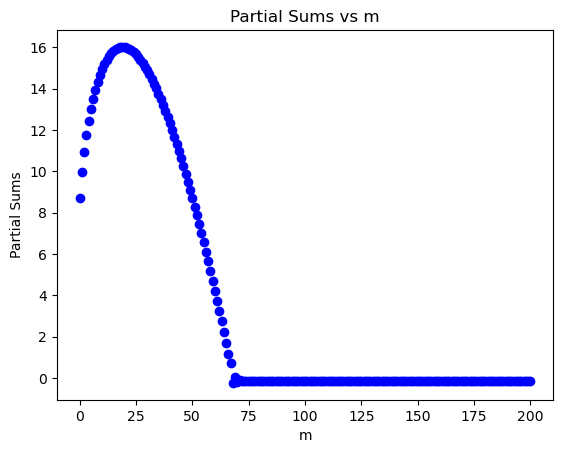

In [3]:
data = []
n = []
for m in range(201):
    n.append(m)
    data.append(math.log10((abs(S(-20,m)-math.exp(-20)))/math.exp(-20)))

plt.title('Partial Sums vs m')
plt.xlabel('m')
plt.ylabel('Partial Sums')
plt.scatter(n,data, c='b')
plt.show()

##### 3.

As k becomes large (-20)^k exceeds the range of representable numbers in floating point leading to loss of precision which accumulates as more terms are added. Also, k! quickly increases with k and soon after the value effectively becomes zero as the precision cannot keep the smaller digits.

##### 4.

96 must be the threshold where the floating point precision is not enough to represent the calculated value, so all proceeding terms will be rounded to the same number.

##### 5.

I tried just doing the power series approximation for exp(20) then taking the inverse since exp(20) does not become too small.

In [4]:
exp_20 = S(20, 100)
exp_neg_20 = 1 / exp_20
print("exp(-20) computed using power series approximation:", exp_neg_20)
print("exp(-20) computed using math.exp:", math.exp(-20))

exp(-20) computed using power series approximation: 2.0611536224385583e-09
exp(-20) computed using math.exp: 2.061153622438558e-09


#### Problem 2

##### 1.

In [5]:
def d_c(f,x,h):
    return (f(x+h)-f(x-h))/(2*h)

##### 2.

In [6]:
def g(x):
    return 1/(1+x**2)

##### 3.

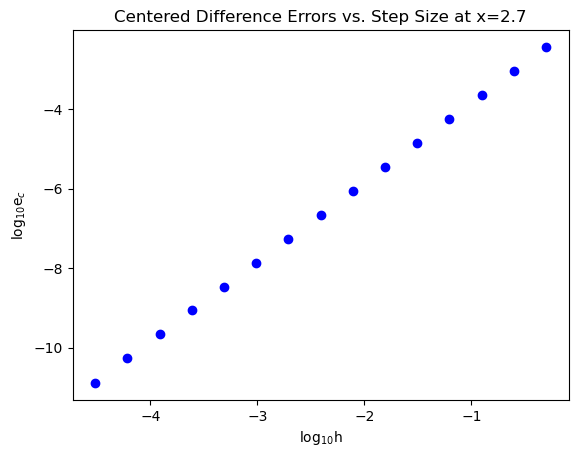

In [7]:
def e_c(x,h):
    errors = abs(d_c(g,x,h) + (2*x)/(1 + x**2)**2)
    return errors

h_values  = np.array([2**(-k) for k in range(1,16)])
cent_diff = np.array([d_c(g,2.7,h_values)])
cd_errors = e_c(2.7, h_values)

plt.scatter(np.log10(h_values), np.log10(cd_errors), c='b')
plt.xlabel('log$_{10}$h')
plt.ylabel('log$_{10}$e$_c$')
plt.title('Centered Difference Errors vs. Step Size at x=2.7')
plt.show()

##### 4.

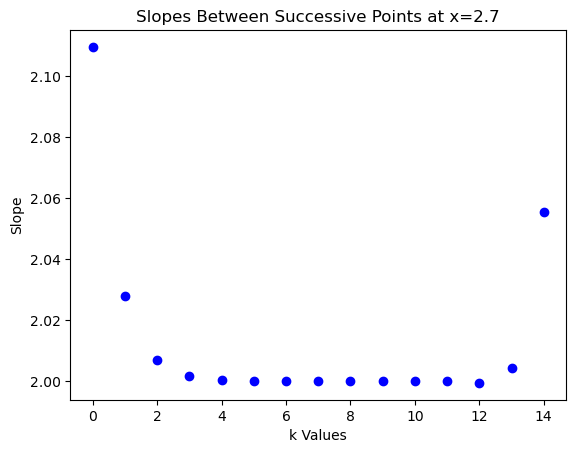

In [8]:
h_values = np.array([2**(-k) for k in range(0,15)])
h_minus1 = np.array([2**(-k-1) for k in range(0,15)])
slopes = (np.log10(e_c(2.7, h_minus1)) - np.log10(e_c(2.7,h_values)))/(np.log10(h_minus1)-np.log10(h_values))
k_values = np.array([k for k in range(0,15)])
plt.scatter(k_values, slopes, c='b')
plt.xlabel('k Values')
plt.ylabel('Slope')
plt.title('Slopes Between Successive Points at x=2.7')
plt.show()

##### 5.

Since the plot is linear in logspace then the relation must be a powerlaw of general form Ch^a and since the slopes between points on the seconf plot are ~2, then we can estimate alpha of 2.

##### 6.

One reason could be that the function g(x) has different slopes at x=1 and x=2.7 and maybe a shallower slope at x=1 leads to faster convergence.

/var/folders/vd/qnx9n6l93rb__v127l9wyln40000gn/T/ipykernel_8714/2174830295.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(h_values), np.log10(cd_errors), c='b')


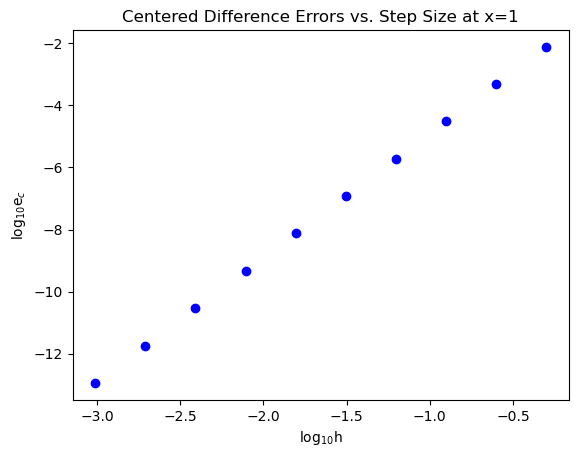

In [9]:
h_values  = np.array([2**(-k) for k in range(1,16)])
cent_diff = np.array([d_c(g, 1, h_values)])
cd_errors = e_c(1, h_values)
plt.scatter(np.log10(h_values), np.log10(cd_errors), c='b')
plt.xlabel('log$_{10}$h')
plt.ylabel('log$_{10}$e$_c$')
plt.title('Centered Difference Errors vs. Step Size at x=1')
plt.show()